Generates the core files for computing axion survival

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import LinearNDInterpolator
import multiprocessing

In [5]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.formatter.use_mathtext"] = True

In [6]:
cm_per_Rsun = 6.957e10
g_per_Msun = 1.998e33
G_cgs = 6.674e-8
c_cgs = 2.998e10
E0_ev = 4.402e5

In [7]:

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]


trace = [
    'na23',
]

color = {
    'c12': 'slateblue',
    'o16': 'orangered',
    'ne20': 'forestgreen',
    'na23': 'darkorange',
}


ls = {
    'c12': 'solid',
    'o16': 'dashed',
    'ne20': 'dotted',
    'na23': 'solid',
}


labels = {
    'c12': '$^{12}$C',
    'o16': '$^{16}$O',
    'ne20': '$^{20}$Ne',
    'na23': '$^{23}$Na',
}

In [34]:
m = 11
g = -10
key = f'm{m:04.1f}_g{g:+04.2f}_0'
index = pd.read_csv(f'csv/{key}/index.csv')
t = np.array(index["time to core O depletion (years)"])
N = np.array(index["surface num_a (/s)"])

In [35]:
rmax = 0.1 # Rsun
N = 1000
x = np.linspace(0, rmax, N)


In [36]:
for i in index["slice"]:
    if i < 1000 or i % 10 != 0: continue
    s = pd.read_csv(f'csv/{key}/slice_{int(i)}.csv')
    
    data = dict()
    r = np.array(s["r (Rsun)"])
    dN = np.diff(s["num_a (/s)"], prepend=0)
    dM = np.array(s["dm (g)"]) / g_per_Msun
    dr = np.array(s["dr (cm)"]) / cm_per_Rsun
    dV = np.diff((4/3) * np.pi * r * r * r, prepend=0)
    data["radius (Rsun)"] = x
    data["T8"] = np.interp(x, r, s["T (K)"]) / 1e8
    data["mass (Msun)"] = np.interp(x, r, s["mass enclosed (Msun)"])
    data["mass density (Msun Rsun-3)"] = np.interp(x, r, dM/dV)
    data["axion flux (s-1)"] = np.interp(x, r, s["num_a (/s)"])
    data["axion emission density (s-1 Rsun-3)"] = np.interp(x, r, dN/dV)
    
    for iso in isotopes:
        data["X_" + iso] = np.interp(x, r, s["X_" + iso])

    df = pd.DataFrame(data)
    df.to_csv(f'csv_simple_new/{m:02}_cores/core_{int(i)}.csv', index=False)

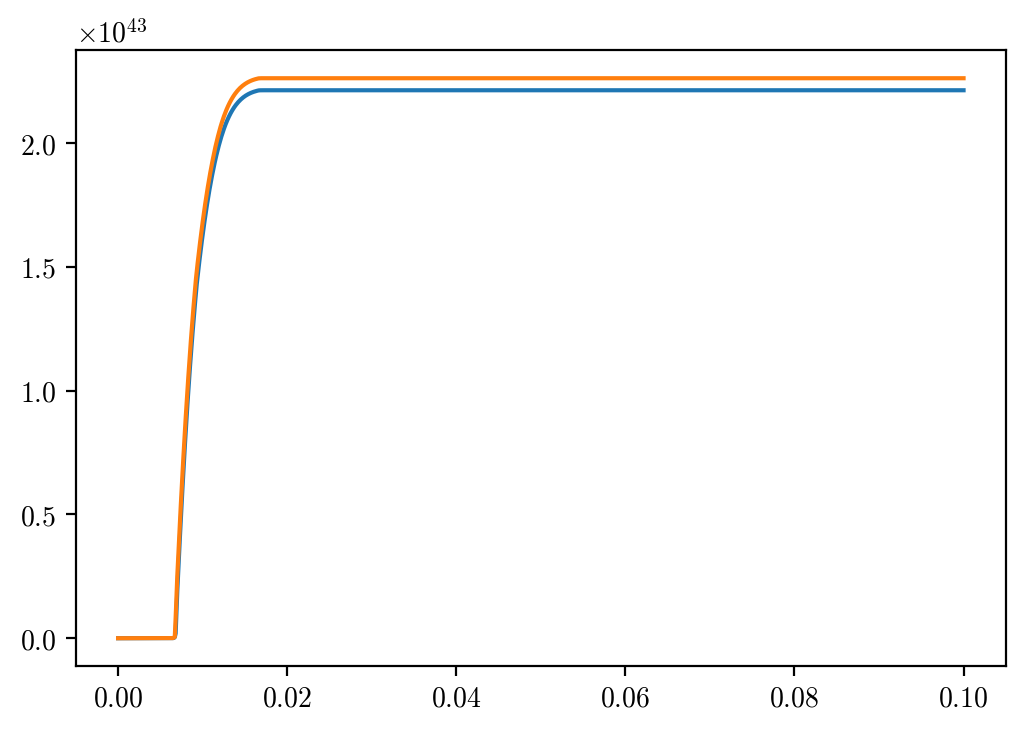

In [95]:
S = pd.read_csv('csv_simple_new/10_cores/core_2300.csv')
R = S['radius (Rsun)']
plt.plot(R, S['axion flux (s-1)'])
plt.plot(R, np.cumsum(np.pi * 4 * R**2 * 0.0001 * S['axion emission density (s-1 Rsun-3)']))